# Load and Preprocess the Images: Convert the images into a format suitable for analysis, typically involving resizing and normalizing the pixel values.

# Import Necessary Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Define Directories and Class Names

In [2]:
train_directory = 'archive/train'
validation_directory = 'archive/test'
CLASS_NAMES = ['FAKE', 'REAL']

# Create ImageDataGenerators for Training and Validation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load Images from Directories

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical' # or 'categorical' if more than two classes
)

validation_generator = val_datagen.flow_from_directory(
    validation_directory,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical' # or 'categorical'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Displaying Preprocessed Images

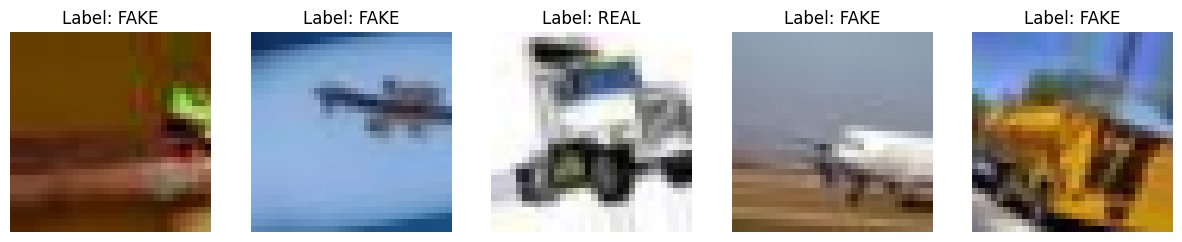

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for X_batch, Y_batch in train_generator:
    for i in range(5):
        ax = axes[i]
        ax.imshow(X_batch[i])
        ax.set_title(f"Label: {CLASS_NAMES[np.argmax(Y_batch[i])]}")
        ax.axis('off')
    break
plt.show()

# Model creation 

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Epoch 1/10
3125/3125 [==============================] - 294s 94ms/step - loss: 0.4116 - accuracy: 0.8123 - val_loss: 0.5389 - val_accuracy: 0.7693
Epoch 2/10
3125/3125 [==============================] - 251s 80ms/step - loss: 0.3123 - accuracy: 0.8705 - val_loss: 0.6391 - val_accuracy: 0.7733
Epoch 3/10
3125/3125 [==============================] - 288s 92ms/step - loss: 0.2798 - accuracy: 0.8875 - val_loss: 0.3818 - val_accuracy: 0.8485
Epoch 4/10
3125/3125 [==============================] - 284s 91ms/step - loss: 0.2596 - accuracy: 0.8947 - val_loss: 0.7137 - val_accuracy: 0.7715
Epoch 5/10
3125/3125 [==============================] - 236s 76ms/step - loss: 0.2477 - accuracy: 0.9014 - val_loss: 0.4358 - val_accuracy: 0.8403
Epoch 6/10
3125/3125 [==============================] - 183s 58ms/step - loss: 0.2407 - accuracy: 0.9041 - val_loss: 0.4823 - val_accuracy: 0.8249
Epoch 7/10
3125/3125 [=========

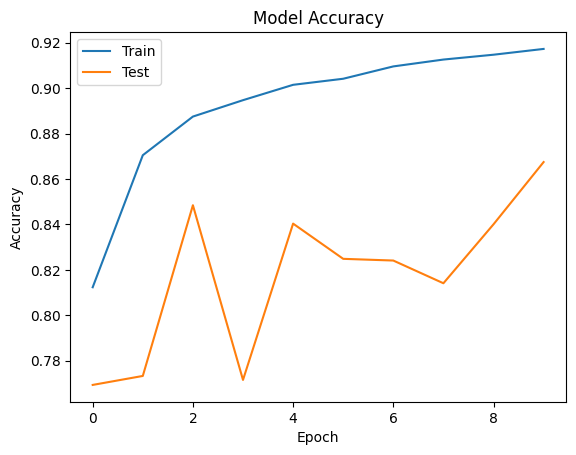

In [6]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Directories
train_directory = 'archive/train'
validation_directory = 'archive/test'

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load Images
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(32, 32), batch_size=32, class_mode='binary')
validation_generator = val_datagen.flow_from_directory(validation_directory, target_size=(32, 32), batch_size=32, class_mode='binary')

# Model Architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Change the number of neurons and activation
])

# Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Change loss function

# Train the Model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Visualize Training Process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Fake', 'Real']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


625/625 [==============================] - 8s 13ms/step
Confusion Matrix
[[10000     0]
 [10000     0]]
Classification Report
              precision    recall  f1-score   support

        Fake       0.50      1.00      0.67     10000
        Real       0.00      0.00      0.00     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
!apt-get install graphviz -y
!pip install pydot pydot-ng

zsh:1: command not found: apt-get
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model


# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # New FC layer, adjust as needed
predictions = Dense(2, activation='softmax')(x)  # New softmax layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

#  Adversarial Robustness


In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import CategoricalCrossentropy

# Load your trained model
model = model

# Create an adversarial example
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = CategoricalCrossentropy()(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Example usage
image = tf.constant(X_batch[0:1])  # Replace with your test image
label = tf.constant(Y_batch[0:1])  # Replace with the correct label
perturbations = create_adversarial_pattern(image, label)
adversarial = image + 0.1 * perturbations  # Adjust epsilon value as needed

# Evaluate model on adversarial example
model.evaluate(adversarial, label)


1/1 [==============================] - 1s 1s/step - loss: 0.8720 - accuracy: 0.0000e+00


[0.8719981908798218, 0.0]

# Interpretability

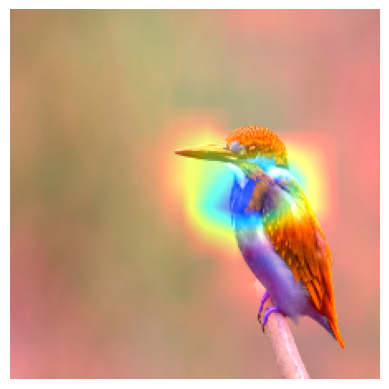

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to create Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to overlay heatmap on image
def apply_heatmap(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    superimposed_img = heatmap * intensity + original_img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')
    return superimposed_img

# Load a pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load and preprocess an image
img_path = 'bird.jpeg'  
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Grad-CAM heatmap
last_conv_layer_name = 'block5_conv3'  # Last conv layer in VGG16
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Prepare original image
original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (224, 224))

# Apply heatmap
superimposed_img = apply_heatmap(heatmap, original_img)

# Display the image
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 518ms/step
Prediction (1 = real, 0 = fake): 1.0667759e-13


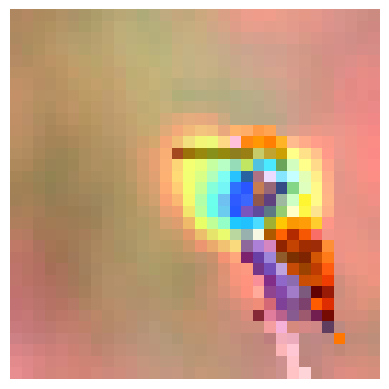

In [12]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input  # Assuming VGG16 preprocessing

# Assuming 'real_fake_model' is your trained model for real vs. fake image classification

# Function to create Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to overlay heatmap on image
def apply_heatmap(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    superimposed_img = heatmap * intensity + original_img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')
    return superimposed_img

# Load and preprocess an image
img_path = 'bird.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224 for VGG16
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # VGG16 specific preprocessing


# Predict if the image is real or fake
prediction = model.predict(img_array)

# Print prediction
print("Prediction (1 = real, 0 = fake):", prediction[0][0])

# Generate Grad-CAM heatmap
last_conv_layer_name = 'block5_conv3'  # Last convolutional layer in VGG16
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Prepare original image
original_img = cv2.imread(img_path)
original_img = cv2.resize(original_img, (32, 32))  # Match resize to your model input

# Apply heatmap
superimposed_img = apply_heatmap(heatmap, original_img)

# Display the image
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


# Comparitive Analysis

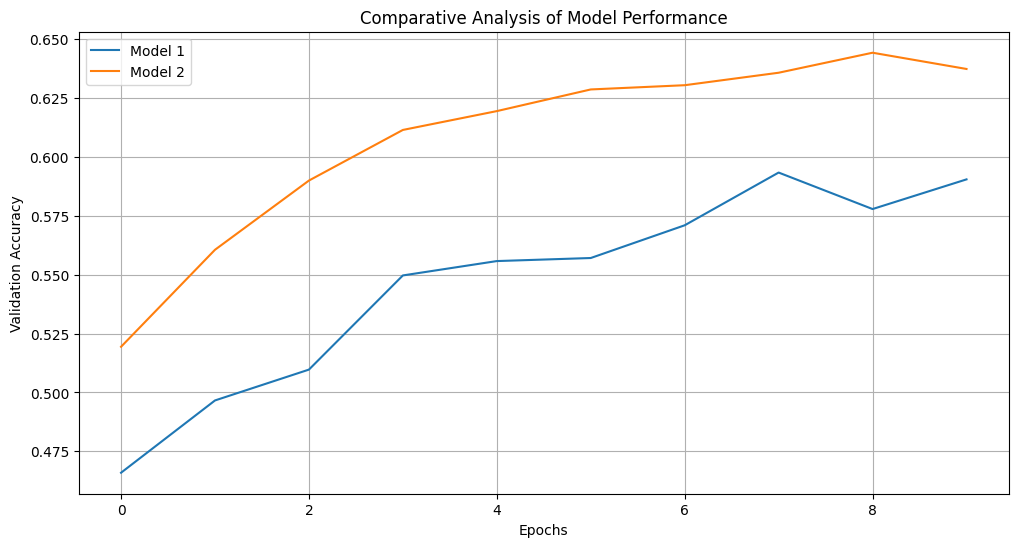

Model      Test Loss       Test Accuracy  
Model 1    1.1710          0.5905         
Model 2    1.0422          0.6374         


In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    return x_train, y_train, x_test, y_test

# Define a list of different model configurations to compare
model_configs = [
    {
        'name': 'Model 1',
        'architecture': [
            Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ],
        'optimizer': Adam(),
        'epochs': 10
    },
    {
        'name': 'Model 2',
        'architecture': [
            Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ],
        'optimizer': Adam(),
        'epochs': 10
    }
]

# Function to train and evaluate a model
def train_and_evaluate_model(model_config, x_train, y_train, x_test, y_test):
    model = tf.keras.Sequential(model_config['architecture'])
    model.compile(optimizer=model_config['optimizer'],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=model_config['epochs'], validation_data=(x_test, y_test), verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return {
        'name': model_config['name'],
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'history': history
    }

# Function to print results in a table format
def print_results(results):
    print("{:<10} {:<15} {:<15}".format("Model", "Test Loss", "Test Accuracy"))
    for result in results:
        print("{:<10} {:<15.4f} {:<15.4f}".format(result['name'], result['test_loss'], result['test_accuracy']))

# Main code
x_train, y_train, x_test, y_test = load_and_preprocess_data()
results = []

# Iterate through each model configuration and train/evaluate the models
for config in model_configs:
    result = train_and_evaluate_model(config, x_train, y_train, x_test, y_test)
    results.append(result)

# Compare and visualize the results
plt.figure(figsize=(12, 6))
for result in results:
    plt.plot(result['history'].history['val_accuracy'], label=result['name'])

plt.title('Comparative Analysis of Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print results in a table format
print_results(results)